In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
np.random.seed(0)

In [30]:
def distanceMatrix(nodes,N):
    dim = N + 1
    dis = np.zeros([dim,dim])
    for i in range(1,dim):
        for j in range(i+1,dim):
            a = np.array(nodes[i-1])
            b = np.array(nodes[j-1])
            c = np.sum((a-b)**2)
            c = np.sqrt(c)
            dis[i,j] = c
            dis[j,i] = c
    return dis

In [64]:
def load_TSP(path='datasets/eil76.txt'):
    with open(path, 'r') as f: 
        inputData = f.readlines()
    N = int(inputData[0].strip())
    nodes = []
    for line in inputData[1:]:
        line = line.strip()
        line = line.split(' ')
        nodes.append([int(line[1]),int(line[2])])
    dis = distanceMatrix(nodes,N)
    return N,nodes,dis

In [65]:
N_TSP,nodes_TSP,dis_TSP = load_TSP()

In [66]:
def decodeTSP(individual, n = N_TSP):
    return np.array(np.argsort(individual)+1)

In [67]:
def f_cost_TSP(individual, n = N_TSP):
    cost = 0
    for i in range(n-1):
#         print(i,i+1)
        cost += dis_TSP[individual[i],individual[i+1]]
    cost += dis_TSP[individual[n-1],individual[0]]
    fitness = 1/cost
    return cost,fitness

In [68]:
def Factorial_Cost(indiv):
    decode = decodeTSP(indiv)
    return f_cost_TSP(decode)

In [69]:
import math

def cross_SBX(p1, p2, nc = 2):
    u = np.random.random_sample()
    if u < 0.5:
        beta = math.pow(2*u, 1/(nc+1))
    else:
        beta = math.pow(0.5/(1-u), 1/(nc+1))

    c1 = 0.5*((1+beta)*p1 + (1-beta)*p2)
    c2 = 0.5*((1-beta)*p1 + (1+beta)*p2)

    return c1, c2

In [70]:
def mutation(individual, e = 0.15):
    n = len(individual)
    res = np.array(individual)

    index1 = np.random.randint(n)
    index2 = np.random.randint(n)
    while index1 == index2:
        index2 = np.random.randint(n)

    res[index1] -= e
    res[index2] += e

    return res

In [71]:
def chooseParents(pop):
    n = len(pop)
    index1 = np.random.randint(n)
    while True:
        index2 = np.random.randint(n)
        if index1 != index2: break
    index3 = np.random.randint(n)
    while True:
        index4 = np.random.randint(n)
        if index3 != index4: break
    
    if pop[index1][2] > pop[index2][2]:
        p1 = pop[index1]
    else:
        p1 = pop[index2]
    
    if pop[index3][2] > pop[index4][2]:
        p2 = pop[index3]
    else:
        p2 = pop[index4]
    
    return p1, p2

In [72]:
def GeneratorIndiv(dims=N_TSP):
    indiv = np.random.random_sample((dims, ))
    return indiv, Factorial_Cost(indiv)

In [73]:
def Generate_Eval(sizePop, d = N_TSP):
    population = []

    for i in range(sizePop):
        pi, cost_fitness = GeneratorIndiv()
        population.append([pi, cost_fitness[0],cost_fitness[1]])
        
            

    return population

In [74]:
def update_new_pop(pre_pop, offs_pop,opt):
    if(opt==1):
        pop = pre_pop + offs_pop
        pop.sort(key=lambda indiv: indiv[2], reverse = True)
        next_pop = pop[:len(pre_pop)]
    else:
        pre_pop.sort(key=lambda indiv: indiv[2], reverse = True)
        sizePre = int(len(pre_pop)/2)
        next_pop = pre_pop[:sizePre] + offs_pop
    #random.shuffle(next_pop)

    return next_pop

In [79]:
from tqdm import tqdm
import random
def GA(size_pop, num_gens, rmp,opt):
    population = Generate_Eval(sizePop=size_pop)
    logg = []
    n_offsT = int(size_pop/4)

    t = 0
    for t in range(num_gens):
        offs_pop = []
        num_cross = 0
        while num_cross < n_offsT:
            p1, p2 = chooseParents(population)
            c1, c2 = cross_SBX(p1[0], p2[0])
                
            if np.random.random_sample() < rmp:
                c1 = mutation(c1)
            if np.random.random_sample() < rmp:
                c2 = mutation(c2)
            num_cross +=1
            #update fitness, f_cost
            cost_fitness_c1 = Factorial_Cost(c1)
            cost_fitness_c2 = Factorial_Cost(c2)
            offs_pop.append([c1,cost_fitness_c1[0],cost_fitness_c1[1]])
            offs_pop.append([c2,cost_fitness_c2[0],cost_fitness_c2[1]])
            
            
        population = update_new_pop(population, offs_pop,opt)
        
        best = population[0][1]
        
        
        logg.append( best)
        random.shuffle(population)
        t += 1
    
    return logg

In [80]:
history1 = GA(400,2000,0.5,1)
# history2 = GA(400,2000,0.5,2)

In [81]:
def show(his):
    best = np.array(his).min()
    plt.plot(his)
    plt.title('TSP best: {best}'.format(best=best))
    plt.show()

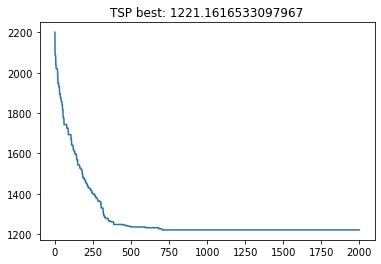

In [82]:
show(history1)

In [46]:
show(history2)

NameError: name 'history2' is not defined